In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [8]:
# Convert Sex column to numeric
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Create FamilySize feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Create IsAlone feature
train['IsAlone'] = 1  # initialize to yes/1
train.loc[train['FamilySize'] > 1, 'IsAlone'] = 0

In [9]:
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

In [11]:
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')

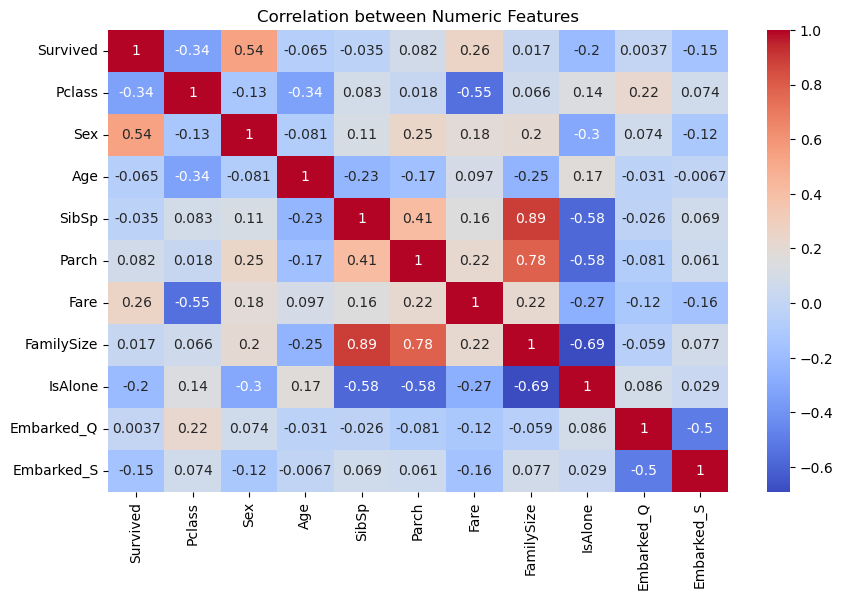

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()

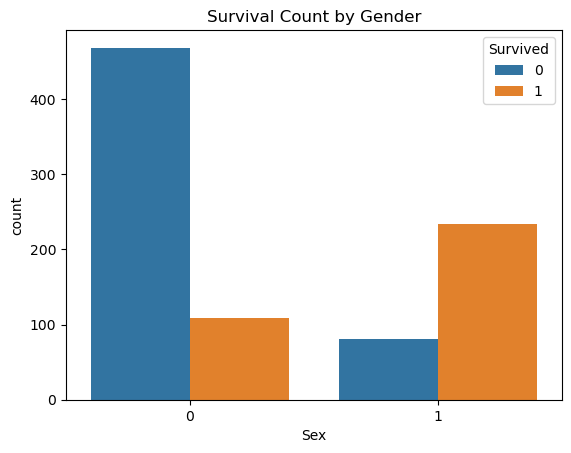

In [13]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Count by Gender')
plt.show()


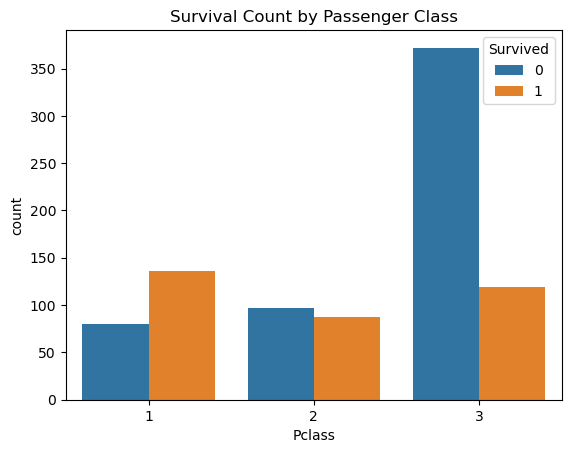

In [14]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count by Passenger Class')
plt.show()

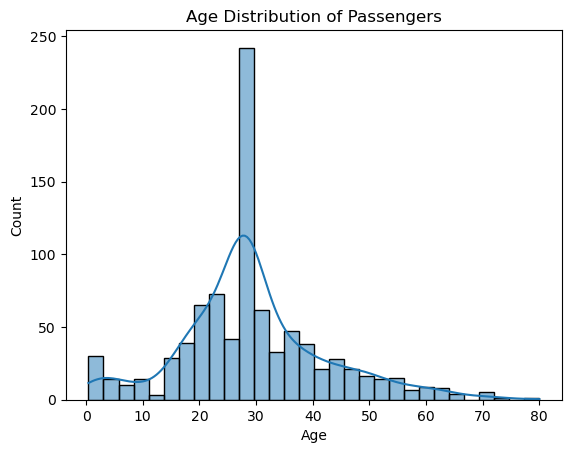

In [15]:
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

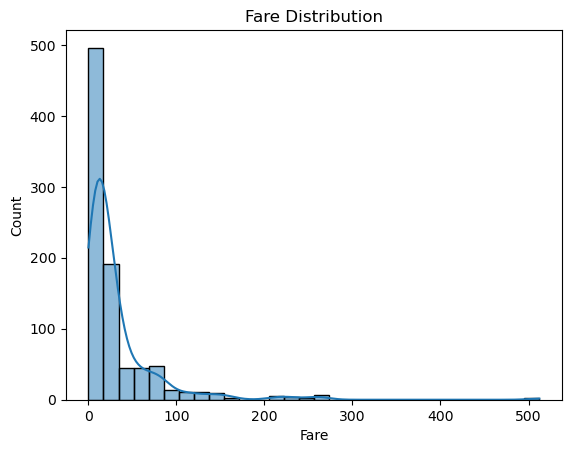

In [16]:
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

In [17]:
print("Average Age:", round(train['Age'].mean(), 2))
print("Average Fare:", round(train['Fare'].mean(), 2))
print("Survival Rate:", round(train['Survived'].mean()*100, 2), "%")

Average Age: 29.36
Average Fare: 32.2
Survival Rate: 38.38 %
